In [5]:
import os
import sys
import re
import matplotlib
import pandas as pd
import numpy as np
from os.path import splitext
import ipaddress as ip
import tldextract
import whois
import datetime
from urlparse import urlparse

In [126]:
df = pd.read_csv("dataset.csv")

df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL,Lable
0,http://home.earthlink.net/~ralphcooper/index.htm,0
1,http://paypal.com.cpsess8151886677frontendpape...,1
2,http://treamicijax.com/Folder/,1
3,http://www.slrecords.us/,0
4,http://www.germany-usa.com/,0


In [127]:
featureSet = pd.DataFrame(columns=('url','len of url',\
'len of domain','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))
#featureSet = pd.DataFrame(columns=('url','len of url','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
#'presence of suspicious domain','label'))

In [63]:
import logging as log
import csv as CS
from Web_Url_Feature import Weburlfeature as WF
from web_main import Webmain
def getFeatures(url, label):
    result=[]
    url = str(url)
    result.append(url)
    
    result.append(len(url))
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    #if ip address is being used as url
    result.append(isip(ext.domain))
    
    #the number of queries  made   
    result.append(len(path.query))
    
    #presence of Suspicious Top level domain
    result.append(1 if ext.suffix in Suspicious_TLD else 0)
    
    #check if FQDN is supspicious
    result.append(1 if '.'.join(ext[1:]) in Suspicious_Domain else 0 )
    caller = Webmain()
    caller.testUrlfile('test.txt','test_features.csv')
    
    result.append(str(label))
    return result


In [7]:
len(df) #displaying 5 records

7030

In [64]:
Suspicious_TLD=['zip','cricket','link','work','party','gq','kim','country','science','tk']
Suspicious_Domain=['luckytime.co.kr','mattfoll.eu.interia.pl','trafficholder.com','dl.baixaki.com.br','bembed.redtube.comr','tags.expo9.exponential.com','deepspacer.com','funad.co.kr','trafficconverter.biz']

In [65]:
def countdots(url):  
    return url.count('.')

In [66]:
def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1
    
    return count

In [67]:
import ipaddress as ip #works only in python 3

def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0

In [68]:

def isPresentHyphen(url):
    return url.count('-')

In [69]:
def isPresentAt(url):
    return url.count('@')

In [70]:
def isPresentDSlash(url):
    return url.count('//')

In [71]:
def countSubDir(url):
    return url.count('/')

In [72]:
def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))

In [73]:
def countQueries(query):
    if not query:
        return 0
    else:
        return len(query.split('&'))

In [74]:
def get_ext(url):
    """Return the filename extension from url, or ''."""
    
    root, ext = splitext(url)
    return ext

In [131]:

def getFeatures(url, label): 
    result = []
    url = str(url)
    
    #add the url to feature set
    result.append(url)
    #length of the url
    result.append(len(url))
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    
   
  
    #length of domain name    
    result.append(len(path.netloc))
    

    #Adding domain information
    
    #if IP address is being used as a URL     
    result.append(isip(ext.domain))
    
    #presence of Suspicious_TLD
    result.append(1 if ext.suffix in Suspicious_TLD else 0)
    
    #presence of suspicious domain
    result.append(1 if '.'.join(ext[1:]) in Suspicious_Domain else 0 )
     
   
    #result.append(get_ext(path.path))
    result.append(str(label))
    return result
                  
     
    

In [129]:
from Web_Url_Feature import Weburlfeature as WF
from web_main import Webmain
caller = Webmain()
caller.testUrlfile('test.txt','test_features.csv')

Processig Request......
{'url_path_max': 0, 'url_security_words_count': 0, 'url_path_count': 0, 'url_host_max': 6, 'url_host_len': 10, 'url_safe_browsing': -1, 'avg_url_host_len': 4.5, 'rank_country_url': -1, 'url_token_count': 3, 'url_token_max': 6, 'avg_url_token_len': 4.333333333333333, 'ipaddress_existence': 0, 'url_asn_no': -1, 'rank_url_host': -1, 'url_host_count': 2, 'avg_url_path_len': 0, 'url_host': 'google.com', 'url_dots': 1, 'url_path': '', 'url_len': 17, 'url_address': 'http://google.com'}
Processig Request......
{'url_path_max': 0, 'url_security_words_count': 0, 'url_path_count': 0, 'url_host_max': 8, 'url_host_len': 12, 'url_safe_browsing': -1, 'avg_url_host_len': 5.5, 'rank_country_url': -1, 'url_token_count': 3, 'url_token_max': 8, 'avg_url_token_len': 5.0, 'ipaddress_existence': 0, 'url_asn_no': -1, 'rank_url_host': -1, 'url_host_count': 2, 'avg_url_path_len': 0, 'url_host': 'facebook.com', 'url_dots': 1, 'url_path': '', 'url_len': 19, 'url_address': 'http://facebook.

{'url_path_max': 0, 'url_security_words_count': 0, 'url_path_count': 0, 'url_host_max': 6, 'url_host_len': 9, 'url_safe_browsing': -1, 'avg_url_host_len': 4.0, 'rank_country_url': -1, 'url_token_count': 3, 'url_token_max': 6, 'avg_url_token_len': 4.0, 'ipaddress_existence': 0, 'url_asn_no': -1, 'rank_url_host': -1, 'url_host_count': 2, 'avg_url_path_len': 0, 'url_host': 'google.de', 'url_dots': 1, 'url_path': '', 'url_len': 16, 'url_address': 'http://google.de'}
Processig Request......
{'url_path_max': 0, 'url_security_words_count': 0, 'url_path_count': 0, 'url_host_max': 3, 'url_host_len': 6, 'url_safe_browsing': -1, 'avg_url_host_len': 2.5, 'rank_country_url': -1, 'url_token_count': 3, 'url_token_max': 4, 'avg_url_token_len': 3.0, 'ipaddress_existence': 0, 'url_asn_no': -1, 'rank_url_host': -1, 'url_host_count': 2, 'avg_url_path_len': 0, 'url_host': 'vk.com', 'url_dots': 1, 'url_path': '', 'url_len': 13, 'url_address': 'http://vk.com'}
Processig Request......
{'url_path_max': 0, 'url

In [132]:
for i in range(len(df)):
    features = getFeatures(df["URL"].loc[i], df["Lable"].loc[i])    
    featureSet.loc[i] = features

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
from __future__ import division

ValueError: color kwarg must have one color per dataset

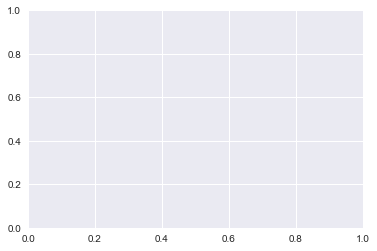

In [133]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['presence of Suspicious_TLD'],color='green',label='Benign URLs')
sns.distplot(featureSet[featureSet['label']=='1']['presence of Suspicious_TLD'],color='red',label='Phishing URLs')
plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Suspicious URL')

plt.show()

In [134]:
import sklearn.ensemble as ek
from sklearn import cross_validation, tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [135]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":LogisticRegression()   
}

In [136]:
X = featureSet.drop(['url','label'],axis=1).values
y = featureSet['label'].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [137]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

LogisticRegression : 0.8051209103840683 
RandomForest : 0.8570412517780939 
GradientBoosting : 0.8691322901849218 
GNB : 0.686344238975818 
DecisionTree : 0.8627311522048364 
Adaboost : 0.8428165007112376 
